<h2> Universally Used Functions

Generate Data Function

In [1]:
import random
import time
import pandas as pd

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 
    
    #tracks the number of points in each class
    numPos = 0
    numNeg = 0
    
    # Initialize points and their values
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)

        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(numPos >= (size / 2) and data[i][0] >=  data[i][1]) :
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(numNeg >= (size / 2) and data[i][0] < data[i][1]) :
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] <  data[i][1]):
            data[i].append(1)
            numPos += 1
        else:
            data[i].append(-1)
            numNeg += 1

       
        # Create non-linearly separable data by switching up the value 10% of the time
        if (not linearly_separable and random.randint(1,10) % 10 == 0):
            data[i][2] *= -1
            
    return data

In [2]:
def sep_data(data):
    #separate the points from values for sake of pla
    values=[]
    points=[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
    return [points, values]

ordered function

In [3]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

print function

In [4]:
def print_stats(ls, weights, final_weights, step, total_updates, iterations):
    print('Data set Linearly separable:', ls)
    print('initial learning weights:', weights)
    print('Step size', step)
    print('y =', '(', 1, '*', final_weights[0], '+ x *',final_weights[1], ') / ', -final_weights[2])
    print('total times the weights were updated:', total_updates)
    print('total iterations:', iterations)

Plot Data Function

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_data(data, graph_title, weights=[]):
    
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    if weights:
        x = np.array(range(100))
        y = ((-1*weights[0]) - weights[1]*x) / weights[2]
        plt.plot(x, y) 

PLA Algorithm

In [6]:
import numpy as np
def num_missclassified_points(w, x, y, z = False):
    missed_points = []
    labels_this_run = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if labels_this_run[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

In [7]:
import numpy as np
def pla(x, y, passes, step_size=1, w=[0,0,0]):
    num_updates = 0
    
    num_missed_points = len(x) #assume it starts with them all missclassified
    min_error_result = w #keep track of the min error case for non-linearly separable data
    
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                
                updated = True
                num_updates += 1
                
                #check for the number of misclassified points and keep track of the min error
                if num_missclassified_points(w, x, y) < num_missed_points:
                    num_missed_points = num_missclassified_points(w, x, y)
                    min_error_result = w
        
        if not updated:
            break
    
    if not updated:
        print("First solution found: " , w)
    else:
        print("No perfect solution found, best solution found is ", min_error_result)
        w = min_error_result #return best solution found
    return [w, num_updates, c + 1]
                    

<h3> Generate Test Data:

In [8]:
test_data = generate_data(30, False, min_dist_btwn_points=10)

test_points = sep_data(test_data)[0]
test_values = sep_data(test_data)[1]

<h2>Linearly Separable Data Set

<h3>Generate Training Data:

In [9]:
training_data_ls = generate_data(50, min_dist_btwn_points=10)

#separate for sake of PLA
points = sep_data(training_data_ls)[0]
values = sep_data(training_data_ls)[1]

<h4>Base case w = [0,0,0], step_size = 1, ordered = False

First solution found:  [0, -44, 51]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 0 + x * -44 ) /  -51
total times the weights were updated: 2
total iterations: 2
accuracy: 0.8666666666666667


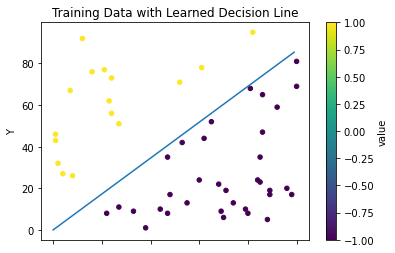

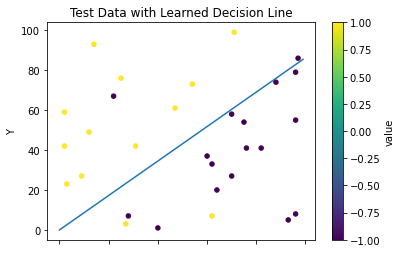

In [10]:
#Run PLA on training Data
results = pla(points, values, 100, step_size=1, w=[0,0,0])
result = results[0]
updates = results[1]
iterations = results[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_ls, 'Training Data with Learned Decision Line', result)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result, 1, updates, iterations)

print('accuracy:', float(30 - num_missclassified_points(result, test_points, test_values, True)) / 30.0 )


<h4>Case I. where w = [1,2,3] step_size = 1, ordered = False

First solution found:  [2, -113, 133]
Data set Linearly separable: True
initial learning weights: [1, 2, 3]
Step size 1
y = ( 1 * 2 + x * -113 ) /  -133
total times the weights were updated: 7
total iterations: 2
accuracy: 0.8666666666666667


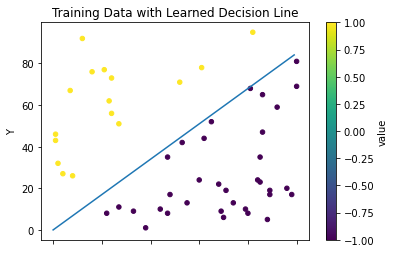

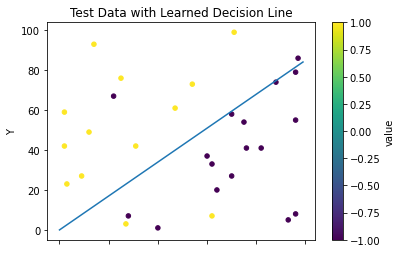

In [11]:
#Run PLA on training Data
results = pla(points, values, 100, step_size=1, w=[1,2,3])
result = results[0]
updates = results[1]
iterations = results[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_ls, 'Training Data with Learned Decision Line', result)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result)

#print the states of the learing algorithm
print_stats(True, [1,2,3], result, 1, updates, iterations)
print('accuracy:', float(30 - num_missclassified_points(result, test_points, test_values, True)) / 30.0 )


<h4> Case II. where w = [0,0,0] step_size = 2, ordered = False

First solution found:  [0, -88, 102]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 0 + x * -88 ) /  -102
total times the weights were updated: 2
total iterations: 2
accuracy: 0.8666666666666667


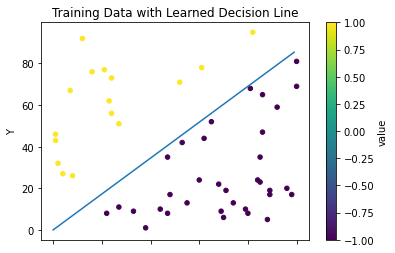

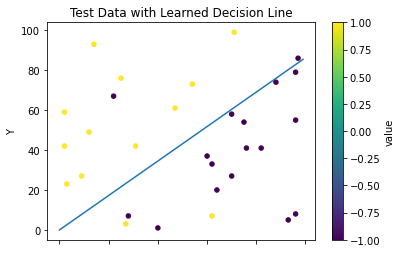

In [12]:
#Run PLA on training Data
results = pla(points, values, 100, step_size=2, w=[0,0,0])
result = results[0]
updates = results[1]
iterations = results[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_ls, 'Training Data with Learned Decision Line', result)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result, 1, updates, iterations)
print('accuracy:', float(30 - num_missclassified_points(result, test_points, test_values, True)) / 30.0 )


<h4> Case III. where w = [0,0,0] step_size = 2, ordered = True

First solution found:  [0, -88, 102]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 0 + x * -88 ) /  -102
total times the weights were updated: 2
total iterations: 2
accuracy: 0.8666666666666667


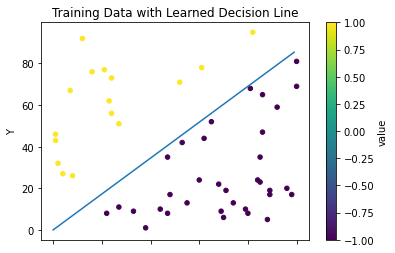

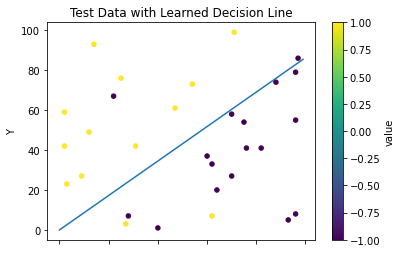

In [13]:
#example
ordered_training_data_ls = order(training_data_ls)

#separate for sake of PLA
ordered_points = sep_data(ordered_training_data_ls)[0]
ordered_values = sep_data(ordered_training_data_ls)[1]

#Run PLA on training Data
results = pla(ordered_points, ordered_values, 100, step_size=2)
result = results[0]
updates = results[1]
iterations = results[2]

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_ls, 'Training Data with Learned Decision Line', result)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result, 1, updates, iterations)
print('accuracy:', float(30 - num_missclassified_points(result, test_points, test_values, True)) / 30.0 )


<h2>Non-Linearly Separable Dataset

<h3>Generate Training Data:

In [14]:
training_data_nls = generate_data(50, linearly_separable=False)

#separate for sake of PLA
points_nls = sep_data(training_data_nls)[0]
values_nls = sep_data(training_data_nls)[1]


<h4>Base case w = [0,0,0], step_size = 1, ordered = False

No perfect solution found, best solution found is  [6, -177, 183]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 6 + x * -177 ) /  -183
total times the weights were updated: 796
total iterations: 100
accuracy: 0.9


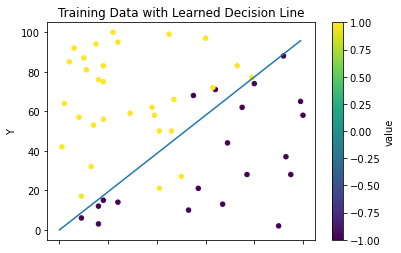

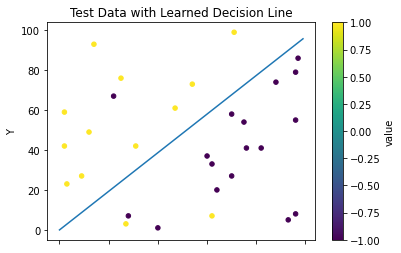

In [15]:
#Run PLA on training Data
results_nls = pla(points_nls, values_nls, 100, step_size=1, w=[0,0,0])
result_nls = results_nls[0]
updates_nls = results_nls[1]
iterations_nls = results_nls[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_nls, 'Training Data with Learned Decision Line', result_nls)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result_nls)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result_nls, 1, updates_nls, iterations_nls)
print('accuracy:', float(30 - num_missclassified_points(result_nls, test_points, test_values, True)) / 30.0 )

<h4>Case I. w = [1,2,3], step_size = 1, ordered = False

No perfect solution found, best solution found is  [6, -164, 169]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 6 + x * -164 ) /  -169
total times the weights were updated: 793
total iterations: 100
accuracy: 0.9


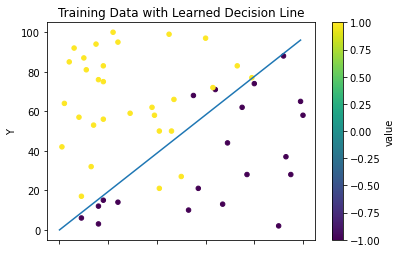

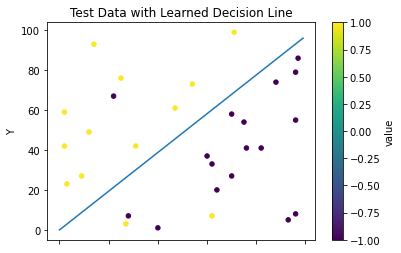

In [16]:
#Run PLA on training Data
results_nls = pla(points_nls, values_nls, 100, step_size=1, w=[1,2,3])
result_nls = results_nls[0]
updates_nls = results_nls[1]
iterations_nls = results_nls[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_nls, 'Training Data with Learned Decision Line', result_nls)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result_nls)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result_nls, 1, updates_nls, iterations_nls)
print('accuracy:', float(30 - num_missclassified_points(result_nls, test_points, test_values, True)) / 30.0 )

<h4> Case II. where w = [0,0,0] step_size = 2, ordered = False

No perfect solution found, best solution found is  [12, -354, 366]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 12 + x * -354 ) /  -366
total times the weights were updated: 796
total iterations: 100
accuracy: 0.9


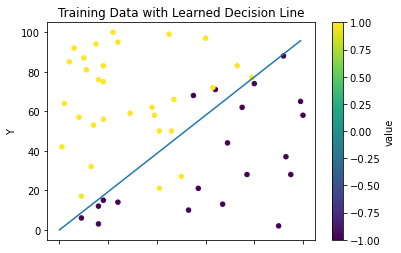

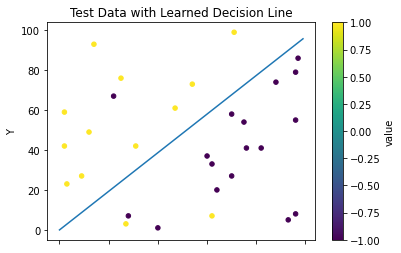

In [17]:
#Run PLA on training Data
results_nls = pla(points_nls, values_nls, 100, step_size=2, w=[0,0,0])
result_nls = results_nls[0]
updates_nls = results_nls[1]
iterations_nls = results_nls[2]

#Plot Training data with Learned Decision Line
plot_data(training_data_nls, 'Training Data with Learned Decision Line', result_nls)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result_nls)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result_nls, 1, updates_nls, iterations_nls)
print('accuracy:', float(30 - num_missclassified_points(result_nls, test_points, test_values, True)) / 30.0 )

<h4> Case III. where w = [0,0,0] step_size = 2, ordered = True

No perfect solution found, best solution found is  [30, -126, 131]
Data set Linearly separable: True
initial learning weights: [0, 0, 0]
Step size 1
y = ( 1 * 30 + x * -126 ) /  -131
total times the weights were updated: 374
total iterations: 100
accuracy: 0.9


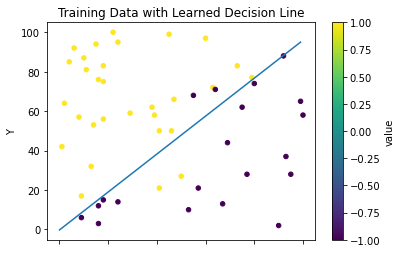

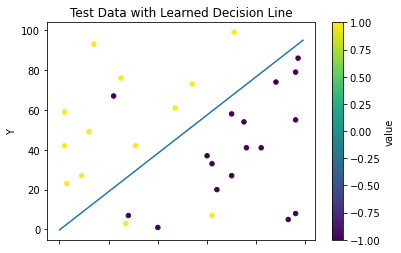

In [18]:
#example
ordered_training_data_nls = order(training_data_nls)

#separate for sake of PLA
ordered_points = sep_data(ordered_training_data_nls)[0]
ordered_values = sep_data(ordered_training_data_nls)[1]

#Run PLA on training Data
results_nls = pla(ordered_points, ordered_values, 100, step_size=1, w=[0,0,0])
result_nls = results_nls[0]
updates_nls = results_nls[1]
iterations_nls = results_nls[2]

#Plot Training data with Learned Decision Line
plot_data(ordered_training_data_nls, 'Training Data with Learned Decision Line', result_nls)

#Plot Test Data with Learned Decision Line
plot_data(test_data, 'Test Data with Learned Decision Line', result_nls)

#print the states of the learing algorithm
print_stats(True, [0,0,0], result_nls, 1, updates_nls, iterations_nls)
print('accuracy:', float(30 - num_missclassified_points(result_nls, test_points, test_values, True)) / 30.0 )